In [1]:
import spacy
from spacy import displacy
from spacy.tokens import Span

# my ner model that identifies retail accessories & apparel related products
my_nlp = spacy.load("../output_3/model-best")

# Much more accurate one the syntac doc analysis but a big file.
nlp = spacy.load("en_core_web_lg")

In [2]:
from file_manager import FileManager

file = FileManager('../notebook/input/necklace_google.html')
file_content = file.read_file()

In [3]:
ent_doc = my_nlp(file_content)
ling_doc = nlp(file_content)

In [4]:
from token_analysis import DualDocAnalysis

analyzer = DualDocAnalysis(ling_doc=ling_doc,ent_doc=ent_doc)

#get main product entities from document
# returns potential important linguistic features related to product
ling_info = analyzer.ling_info
main_keys = analyzer.main_entities
span_info = analyzer.get_related_spans()
analysis = analyzer.get_data_analysis()

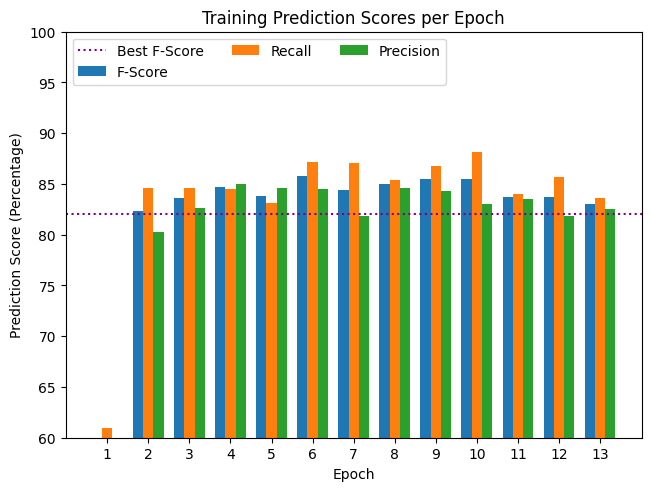

In [6]:
from data_visuals import PipeLineVisuals

my_pipeline_data = PipeLineVisuals()
my_pipeline_data.make_pipeline_graph()
my_pipeline_data.make_ner_loss_graph()

In [8]:
from data_visuals import ScatterPlot

graph_ner_loss = ScatterPlot('../notebook/data/all_pipeline_stats_3.json')
graph_ner_loss.make_ner_loss_graph() # FIXXXX

AttributeError: 'ScatterPlot' object has no attribute 'file_path'

In [ ]:
from token_analysis import DualDocAnalysis
text = """Shop ethically sourced gold earrings for women at Mejuri.
        Discover 14k gold earrings in a variety of styles made from the highest quality materials. 
        Earrings are what I like most.
        Earrings on Sale NOW!"""
analyzer = DualDocAnalysis(ling_doc=nlp(text),ent_doc=my_nlp(text))

#get main product entities from document
# returns potential important linguistic features related to product
ling_info = analyzer.ling_info
span_info = analyzer.get_related_spans()

In [36]:
import spacy
from spacy import displacy
from spacy.tokens import Span

my_nlp = spacy.load("../output_3/model-best")

text = """Shop ethically sourced gold earrings for women at Mejuri.
        Discover 14k gold earrings in a variety of styles made from the highest quality materials.
        Earrings are what I love most.
        """
nlp = spacy.load("en_core_web_lg")
doc = my_nlp(text)

In [37]:
displacy.render(my_nlp(text), style="ent")

In [38]:
doc2 = nlp(text)

In [40]:
from token_analysis import DualDocAnalysis 
analyzer = DualDocAnalysis(ling_doc=nlp(text),ent_doc=my_nlp(text))
ling_info = analyzer.ling_info

In [64]:
import ipywidgets as widgets
from IPython.display import display

keys = analyzer.get_main_sorted_ents()
if len(keys) > 4:
    keys = keys[:4]

drop_down_entity = widgets.Dropdown(
    options=keys,
    value=keys[0],
    description='Entity',
    disabled=False
)

display(drop_down_entity)

labels = {
    'All': 'DESC_NEIGHBORS',
    'Adjective(s)': 'ADJ',
    'Noun(s)': 'N',
    'Adverb(s)': 'ADV'
    
}
key_labels = [label for label in labels]

drop_down_descriptor = widgets.Dropdown(
    options=key_labels,
    value=key_labels[0],
    description='Descriptor',
    disabled=False
)

display(drop_down_descriptor)

truncate = widgets.Text(
    value='10',
    placeholder='10',
    description='Maximum results',
    disabled=False   
)
display(truncate)

Dropdown(description='Entity', options=('necklace', 'necklaces', 'pendant', 'jewelry'), value='necklace')

Dropdown(description='Descriptor', options=('All', 'Adjective(s)', 'Noun(s)', 'Adverb(s)'), value='All')

Text(value='10', description='Truncate', placeholder='Truncate by n')

In [71]:
import pandas as pd

items = analysis[drop_down.value]
label = labels[drop_down_descriptor.value]
curr_dictionary = items[label]
sort_keys = [key for key,value in sorted(curr_dictionary.items(), key=lambda item: item[1],reverse=True) if len(key) > 2]
total = len(sort_keys)
    
if total > int(truncate.value):
    sort_keys = sort_keys[:int(truncate.value)]
    total = int(truncate.value)

print(f"\nDisplaying: {total} results for {drop_down_entity.value}\n")
# Create a list of data for your single column
data = { drop_down_descriptor.value: sort_keys,
         f"Total Appearances":[curr_dictionary[key] for key in sort_keys]
       }

# Create a Pandas Series (which is essentially a single-column DataFrame)
# You can optionally name the column
df = pd.DataFrame(data)

# Display the DataFrame
df



Displaying: 10 results for necklace



,Adjective(s),Total Appearances
0,short,11
1,everyday,6
2,best,6
3,right,6
4,small,5
5,simple,5
6,delicate,5
7,personal,4
8,special,4
9,good,3
